In [1]:
%%html
<style>
    #notebook-container{
    width: 100%
    }
</style>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Problem 3
## Task (c)

In this task I will generate matrix $A$ of size $20 \times 10$ and vector $b$ of size $20 \times 1$. Next I will find solution $\hat x = A^+ b$ using pseudoinverse $A^+$ of matrix $A$, found by using built-in python function. Afterwards, I will implement Richardson iteration scheme in respective method and try to find solution with tolerance 0,001 for the same system $Ax=b$. To show that Richardson method will converge, I will plot norm of distance between $x_k$, calcualted on each step, and $\hat x$ with respect to number of iterations. Expectation  is that such norm should go to 0 with increase of number of iterations.

In [3]:
def richardson_step(x_old, A, b): #defining single step of Richardson iteration scheme
    return x_old - np.dot(A.T,(np.dot(A,x_old)-b))/(np.linalg.norm(A)**2) #calculating new value of x

def richardson_iter(x_old, A, b, acc, x_hat): #defining method for iteration scheme for Richardson
    iter_count = 0
    errors=[]
    
    while True: #implementing do-while loop
        iter_count += 1
        x_new = richardson_step(x_old, A, b) #calculating new value for x using single step method Richardson method
        errors.append(np.linalg.norm(x_new - x_hat)) #calculating errors and saving to list
        if np.linalg.norm(np.dot(A.T,(np.dot(A,x_new)-b))) < acc: #check if exit condition is met - ||A^T(Ax-b)|| < acc
            return x_new, errors #return final result, list of errors and exit loop
            break
        
        x_old = x_new #reassign old value for next iteration
    

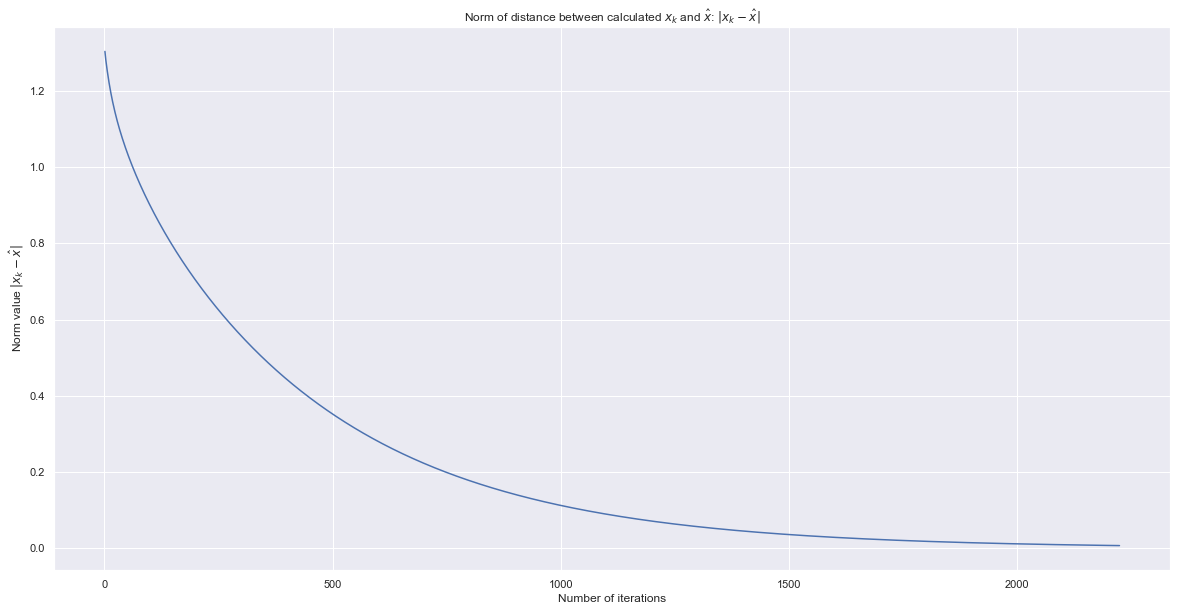

Solution found in 2224 iteratons
Solution found using pseudoinverse 
 [[ 0.23137 -0.38996  0.85896  0.45908  0.17428 -0.08715  0.59027 -0.13201
   0.12858 -0.54262]]
Solution found using Richardson iteration scheme with tolerance 0.001 
 [[ 0.22927 -0.38974  0.85575  0.45602  0.17581 -0.0851   0.58861 -0.13036
   0.12894 -0.5394 ]]


In [17]:
np.random.seed(7) #setting random seed
A = np.random.rand(20,10) #generating matrix A of size 20*10 randomly
b = np.random.rand(20,1) #generating veector b of size 20*1 randomly

x_hat = np.dot(np.linalg.pinv(A), b) #computing x_hat using pseudo-inverse of matrix A

acc = 0.001 #setting accuracy
x0 = np.zeros((10,1)) #setting x0 as zero vector

solution, errors = richardson_iter(x0, A, b, acc, x_hat) #find solution using Richardson iteration scheme

plt.figure(figsize=(20,10)) #ploting norm of distance on each step
sns.lineplot(x=np.arange(1, len(errors)+1, 1), y=np.array(errors))
plt.title('Norm of distance between calculated $x_k$ and $\hat x$: $\|x_k - \hat x \|$')
plt.ylabel("Norm value $\|x_k - \hat x \|$")
plt.xlabel("Number of iterations")
plt.show()

print("Solution found in %s iteratons" %len(errors)) #printing results
print("Solution found using pseudoinverse \n %s" %x_hat.T.round(5))
print("Solution found using Richardson iteration scheme with tolerance %s" %acc, "\n %s" %solution.T.round(5))
# print(np.linalg.norm(x_hat - solution))

As we could observe on the plot, difference between calculated $x_k$ and solution $\hat x$, found by using pseudoinverse matrix $A^+$, is going to 0 with increase of number of iterations: $\|x_k - \hat x\| \to 0$. Eventually, after 2200+ iterations, method converge to approximate solution with tolerance 0.001.

Corollary: Richardson iteration method converge to approximate solution of system $Ax=b$ with given tolerance.